# Lab Assignment 3

## Ivan Nikitin, s2892847

We consider the system $$\frac{dx}{dt}=x(y-1),\quad \frac{dy}{dt}=4-y^2-x^2.$$

## Task 1 (2 marks)

Use `SymPy` to find the critical points of the system.

In [77]:
import sympy as sym

x = sym.symbols('x')
y = sym.symbols('y')

critical_points = sym.solve([sym.Eq(x*(y-1),0),sym.Eq(4-y**2-x**2,0)], (x,y))
print(critical_points)

[(0, -2), (0, 2), (-sqrt(3), 1), (sqrt(3), 1)]


## Task 2 (4 marks)

Give your implementation of the `linearise` function from Lab 3.

Use this to find linear approximations of the system around the critical points with $x \geq 0$ and $y \geq 0$. Use the output to classify these critical points (use markdown cells and proper reasoning to explain the type of each critical point).

In [78]:
# i use functions created during last workshop:

def lin_matrix(system, critical_point): 
    system[0], system[1] = system[0].rhs, system[1].rhs
    system_matrix = sym.Matrix(system) 
    jacobian = system_matrix.jacobian([x(t), y(t)])
    return jacobian.subs({x(t): critical_point[0], y(t):critical_point[1]})

def linearise(system, critical_point): 
    jacobian = lin_matrix(system, critical_point)
    u = sym.Function('u')
    v = sym.Function('v')
    eq1 = sym.Eq(u(t).diff(t), jacobian[0,0]*u(t) + jacobian[0,1]*v(t))
    eq2 = sym.Eq(v(t).diff(t), jacobian[1,0]*u(t) + jacobian[1,1]*v(t))
    return [eq1, eq2]

In [79]:
# we need to redefine x and y as funtions in order to create system of differentioal equations 
x = sym.Function('x')
y = sym.Function('y')
t = sym.symbols('t')

#now define a system itself
eq_1 = sym.Eq(x(t).diff(t),x(t)*(y(t)-1)) 
eq_2 = sym.Eq(y(t).diff(t),4-x(t)**2-y(t)**2)

Linearisation_1 = linearise([eq_1,eq_2], critical_points[1])
Linearisation_2 = linearise([eq_1,eq_2], critical_points[3])

In [80]:
Linearisation_1

In [81]:
Linearisation_2

Eigenvalues of linearization around $(0,2)$ is obviously $1$ and $-4$, so $r_1>0, r_2<0$, therefore, it is a **saddle with non-stable critical point**, which is preserved for original non-linear system too.
For the second linearization, calculate eigenvalues: 


In [82]:
Jacobian_lin2 = lin_matrix([eq_1,eq_2], critical_points[3])
Eigenvalues = Jacobian_lin2.eigenvects()
Eigenvalues

⎡⎛              ⎡⎡  √3   √3⋅(-1 - √5⋅ⅈ)⎤⎤⎞  ⎛              ⎡⎡  √3   √3⋅(-1 + √
⎢⎜              ⎢⎢- ── - ──────────────⎥⎥⎟  ⎜              ⎢⎢- ── - ──────────
⎢⎜-1 - √5⋅ⅈ, 1, ⎢⎢  3          6       ⎥⎥⎟, ⎜-1 + √5⋅ⅈ, 1, ⎢⎢  3          6   
⎢⎜              ⎢⎢                     ⎥⎥⎟  ⎜              ⎢⎢                 
⎣⎝              ⎣⎣          1          ⎦⎦⎠  ⎝              ⎣⎣          1      

5⋅ⅈ)⎤⎤⎞⎤
────⎥⎥⎟⎥
    ⎥⎥⎟⎥
    ⎥⎥⎟⎥
    ⎦⎦⎠⎦

As eigenvalues are complex and $\lambda=-1<0$, linearisation and non-linear system are both **focuses spiralinig into asymptotically stable critical point**.

## Task 3 (4 marks)

Produce a phase portrait of the system, with trajectories showing the behaviour around all the critical points. A few trajectories are enough to show this behaviour. Use properly-sized arrows to diplay the vector field (the RHS of the ODE). There are some marks allocated to the quality of your figure in this part. Try to keep it illustrative yet not too cluttered.

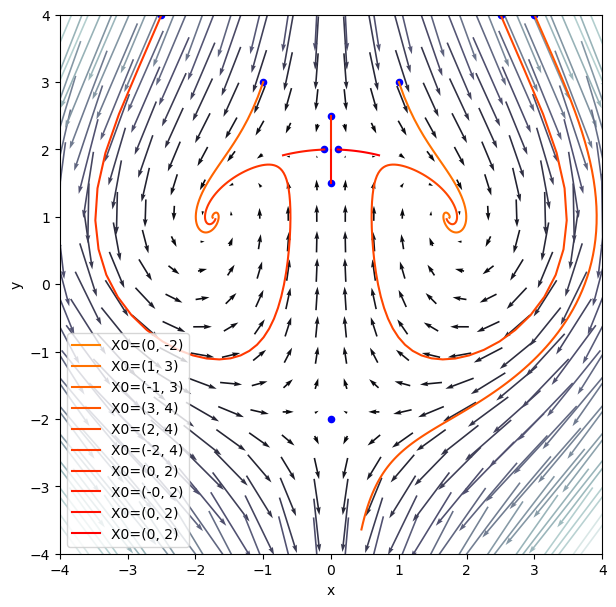

In [105]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def vField(x,t):
    u = x[0]*x[1] - x[0]
    v = 4 - x[0]**2 - x[1]**2
    return [u,v]

X, Y = np.mgrid[-4:4:20j,-4:4:20j]
U, V = vField([X,Y],0)

M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(7, 7))
ax.quiver(X, Y, U, V, M, scale=90, pivot = 'mid', cmap = plt.cm.bone)

ics = [[0,-2],[1,3],[-1,3], [3,4], [2.5,4], [-2.5,4],[0,2.5],[-0.1,2], [0,1.5],[0.1,2]]
durations = [[0,1],[0,4],[0,4], [0,1],[0,5],[0,5], [0,1], [0,2], [0,1],[0,2]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x_sol = odeint(vField, ic, t)
    ax.plot(x_sol[:,0], x_sol[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend()

plt.show()

Notice that around critical point $(0,2)$ for starting point form cross reminding standard basis, which is proved by eigenvectors $(0,1)$ and $(1,0)$. On vertical line, trajectories are going to critical point, which corresponds to negative eigenvalue, as opposed to horizontal trajectories. Thus, this is actually a **saddle** around $(0,2)$. Same applies to **focus** around $(\sqrt{3},1)$